In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=cbdc9560c49f34759370cc455a535e115b2bb273467d1bb2c7e21df0d449ead6
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
!pip install opencv-python

In [3]:
"""
Created on Wed Nov 25 18:24:21 2020

@author: ManavChordia
"""

import face_recognition
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

folders = (os.listdir("/content/drive/My Drive/driver_classified"))
print(folders)

Mounted at /content/drive
['kamlesh', 'shaikh', 'gaikawad', 'unknown']


In [5]:
classes = {}

for i in folders:
    cnt = 0
    for j in ((os.listdir("/content/drive/My Drive/driver_classified/" + i))):
        if cnt == 0:
            classes[i] = []
            image = face_recognition.load_image_file("/content/drive/My Drive/driver_classified/" + i + "/" + j) #load image
            location = face_recognition.face_locations(image,model="cnn") 
            classes[i].append(location)
            cnt = cnt + 1
            print(cnt)
            
        else:
            image = face_recognition.load_image_file("/content/drive/My Drive/driver_classified/" + i + "/" + j) #load image
            location = face_recognition.face_locations(image,model="cnn") 
            classes[i].append(location)
            print(j)

1
1552340979000.jpeg
1552748743000.jpeg
1552364595000.jpeg
1552342812000.jpeg
1552340678000.jpeg
1552255311000.jpeg
1552914116000.jpeg
1552442774000.jpeg
1552359885000.jpeg
1552341293000.jpeg
1552340076000.jpeg
1551918329000.jpeg
1552254421000.jpeg
1552360814000.jpeg
1552180370000.jpeg
1552394987000.jpeg
1552750310000.jpeg
1552916498000.jpeg
1552766907000.jpeg
1552911954000.jpeg
1552358969000.jpeg
1552449497000.jpeg
1552447935000.jpeg
1552268301000.jpeg
1552342503000.jpeg
1552360503000.jpeg
1552448874000.jpeg
1552355337000.jpeg
1552269792000.jpeg
1552448240000.jpeg
1552751248000.jpeg
1552395290000.jpeg
1552740478000.jpeg
1552914996000.jpeg
1552358666000.jpeg
1552443912000.jpeg
1552269197000.jpeg
1552181352000.jpeg
1552268889000.jpeg
1552360196000.jpeg
1552181064000.jpeg
1552914692000.jpeg
1552396204000.jpeg
1552270584000.jpeg
1552364899000.jpeg
1552442072000.jpeg
1552361429000.jpeg
1552359276000.jpeg
1552180776000.jpeg
1552355023000.jpeg
1551929497000.jpeg
1552448552000.jpeg
1552267987

In [6]:
import numpy as np
Y = []
temp = 0
for i in classes:
  print(len(classes[i]))
  for j in range(len(classes[i])):
    Y.append(temp)
  temp = temp + 1

Y = np.array(Y)
print(Y)


69
96
63
20
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [7]:
!pip install keras-facenet

     |████████████████████████████████| 2.3MB 19.6MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-cp36-none-any.whl size=10386 sha256=95ac9f755f48d9f5f27f71f38055d1668d73f8409c05b3d2d9b5f2a7d846c83a
  Stored in directory: /root/.cache/pip/wheels/f6/53/9a/36c4b52fd22faf4f710d5047d874655b85a1b2cf77accfb9bd
Successfully built keras-facenet


In [8]:
from keras_facenet import FaceNet
embedder = FaceNet()
detections = []

# Gets a detection dict for each face
# in an image. Each one has the bounding box and
# face landmarks (from mtcnn.MTCNN) along with
# the embedding from FaceNet.
tot_cnt = 0
Y_new = []
count_list = []
Images = []
for i in folders:
  count_1 = 0
  for j in ((os.listdir("/content/drive/My Drive/driver_classified/" + i))):
    detection = embedder.extract("/content/drive/My Drive/driver_classified/" + i + "/" + j, threshold=0.95)
    if len(detection) != 0:# and count_1 < 20:
      detections.append(detection[0]['embedding'])
      Y_new.append(Y[tot_cnt])
      Images.append(cv2.imread("/content/drive/My Drive/driver_classified/" + i + "/" + j))
      tot_cnt = tot_cnt + 1
      count_1 = count_1 + 1
    else:
      tot_cnt = tot_cnt + 1
  count_list.append(count_1)

In [9]:
print(Images[0].shape)

(480, 640, 3)


In [10]:
Y = np.array(Y_new)
Images = np.array(Images)
print(Y.shape)
X = np.array(detections)
print(X.shape)
print(count_list)
print(Y[0:5].shape)

(226,)
(226, 512)
[66, 84, 59, 17]
(5,)


In [11]:
#count_list.insert(0,0)
#count_list.pop()
#count_list.insert(0,0)
cnt_list = [0]
for i in range(0, len(count_list)):
  temp = 0
  for j in range(0, i+1):
    temp = temp + count_list[j] 
  cnt_list.append(temp-1)
print(cnt_list)

[0, 65, 149, 208, 225]


In [61]:
def train_test_set(X, Y, n, cnt_list):
  y_train = []
  x_train = []
  x_test = []
  y_test = []
  Images_train = []
  Images_test = []
  temp = 0
  #count_list.pop()
  for i in range(len(cnt_list)-1):
    if i != len(cnt_list) - 2:
      x_train.append(X[cnt_list[temp] + 1:cnt_list[temp] + n+1])
      Images_train.append(Images[cnt_list[temp]+1:cnt_list[temp] + n+1])
      x_test.append(X[cnt_list[temp] + n: cnt_list[temp+1]])
      Images_test.append(Images[cnt_list[temp] + n: cnt_list[temp+1]])
      y_train.append( Y[cnt_list[temp]+1:cnt_list[temp] + n+1])
      y_test.append(Y[cnt_list[temp] + n: cnt_list[temp+1]].tolist())
      temp = temp + 1
    else:
      x_test.append(X[cnt_list[temp] :])
      y_test.append(Y[cnt_list[temp] :]) 
      Images_test.append(Images[cnt_list[temp] :])    #print(cnt_list[temp] + n)

  return x_train, y_train, x_test, y_test, Images_train, Images_test

X_train, Y_train, X_test, Y_test, Images_train, Images_test = train_test_set(X, Y, 3, cnt_list)


In [62]:
import itertools
X_train = np.reshape(X_train, (-1, 512))
Y_train = np.reshape(Y_train, (-1,))
Y_test = list(itertools.chain.from_iterable(Y_test))
Y_test = np.array(Y_test)
X_test = np.concatenate((X_test[0], X_test[1], X_test[2], X_test[3]))
Images_train = np.concatenate((Images_train[0], Images_train[1], Images_train[2]))
Images_test = np.concatenate((Images_test[0], Images_test[1], Images_test[2], Images_test[3]))

print(Y_test.shape)#, Y_train.shape, X_test.shape, Y_test.shape )

(217,)


In [63]:
Y_train_ori = Y_train
print(Y_train_ori.shape)

(9,)


In [64]:
def shuffle_in_unison(a, b, c):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    shuffled_c = np.empty(c.shape, dtype=c.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
        shuffled_c[new_index] = c[old_index]
    return shuffled_a, shuffled_b, shuffled_c

X_train, Y_train, Images_train = shuffle_in_unison(X_train, Y_train, Images_train)
X_test, Y_test, Images_test = shuffle_in_unison(X_test, Y_test, Images_test)

In [65]:
X_f_test = X_test[-30:]
Y_f_test = Y_test[-30:]
X_test = X_test[0:-30]
Y_test = Y_test[0:-30]


print(X_f_test.shape)

(30, 512)


In [52]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ts)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
#Y_f_test = Y_f_test.reshape(-1,1)



enc = OneHotEncoder(handle_unknown='ignore')
print(Y_train_ori.shape, Y_train.shape)
Y_train = enc.fit_transform(Y_train).toarray()
Y_test = enc.fit_transform(Y_test).toarray()
#Y_f_test = enc.fit_transform(Y_f_test).toarray()

(9,) (9, 1)


In [67]:

class_count = 3


from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Flatten
from keras.models import Model
from keras.models import Sequential
from keras import backend as K
import keras
def modelFactory(class_count, X_train):
  n_cols = X_train.shape[1]
  model = Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(n_cols,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(class_count, activation= 'softmax', input_shape=(n_cols,))
  ])
  #model.add(Dense(128, activation = 'relu'))
  #model.add(Dropout(0.5))
  #model.add(Dense(64, activation = 'relu'))
  #model.add(Dropout(0.5))
  #opt = keras.optimizers.Adam(learning_rate = 0.0005)
  
  model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
  model.summary()

  return model

#history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=1)
#print(history.history['val_accuracy'][-1])
#return history.history['val_accuracy'][-1]
  

In [68]:
import math
def entropy(thing):
    ent = 0
    
    for i in thing:
        if i == 0:
            i = i + 0.00001
        ent = ent + i * math.log(i, 2)
        
    return -ent

In [69]:
def do_one_hot_encoding(arr):
  print("in func")
  arr = enc.fit_transform(arr.reshape(-1,1)).toarray()
  print("returning")
  return arr


In [70]:
from google.colab.patches import cv2_imshow
from IPython.display import Image
from IPython.display import Image, display


def activeLearning(ent_thresh, tc, c, X_train, Y_train, X_test, Y_test, Images_train, Images_test, Y_train_ori, model):
        
    global class_count
    num_iter = 0
    tot_cntr = 0
    #model = model(class_count)
    while 1: 
        print("in while")
        
        if num_iter == 0:
            #model = model(class_count, X_train)
            model.summary()
            model.fit(X_train, Y_train, epochs=30, verbose=1)
            Y_pred = model.predict(X_test)
            num_iter = num_iter + 1
            
            all_entropies = []
            for i in Y_pred:
                all_entropies.append(entropy(i))
            print(all_entropies)
            all_entropies = np.array(all_entropies)
                
        else:
            print("in else 1")
            
            counter = 0
            not_to_be_removed = []
            not_to_be_removed_y = []
            not_to_be_removed_images = []
            to_be_removed = 0
            for i in range(0, len(all_entropies)):
                if i in all_entropies.argsort()[-5:][::-1] and counter < c and tot_cntr < tc:
                    #print("in if 2")
                    counter = counter + 1
                    tot_cntr = tot_cntr + 1
                    print(Y_test[i])

                    #cv2_imshow(Images_test[i])

                    #cv2.waitKey(1)
                    #cv2.destroyAllWindows()

                    display(0)

                    plt.imshow(Images_test[i])
                    plt.show()
                    print("here 1")
                    y_in = int(input("enter correct class for x_test[" + str(i) + "]"))

                    if y_in >= class_count:
                      print("in this if")
                      class_count = class_count + 1
                      print(class_count)

                    Y_train_ori = np.append(Y_train_ori, y_in)
                    X_train = np.concatenate((X_train, X_test[i].reshape(1, -1)))
                    
                    Y_train = do_one_hot_encoding(Y_train_ori)
                    print(Y_train)
                    print(Y_train_ori)

                    

                    print("here 2")
                    #X_train = np.concatenate((X_train, X_test[i].reshape(1, -1)))
                    Images_train = np.concatenate((Images_train, Images_test[i].reshape(1, Images_test[i].shape[0], -1, 3)))
                    to_be_removed += 1
                            
                else:
                    #print("in else 2")
                    not_to_be_removed.append(X_test[i])
                    not_to_be_removed_y.append(Y_test[i])
                    not_to_be_removed_images.append(Images_test[i])
                    
            X_test = np.array(not_to_be_removed) 
            Y_test = np.array(not_to_be_removed_y)
            Images_test = np.array(not_to_be_removed_images)
                
            if to_be_removed == 0:
                    #print("breaking.......")
                    break
                                    
            print("here 3")
            
            print(X_train.shape)
            model = modelFactory(class_count, X_train)
            model.fit(X_train, Y_train , epochs=30, verbose=1)
            Y_pred = model.predict(X_test)
            num_iter = num_iter + 1
            print("num _t iter = " + str(num_iter))
            
            print("here 4")

            all_entropies = []
            for i in Y_pred:
                all_entropies.append(entropy(i))
            all_entropies = np.array(all_entropies)
            
                
    
                
    return Y_pred, model

ERROR:root:No traceback has been produced, nothing to debug.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 387       
Total params: 164,611
Trainable params: 164,611
Non-trainable params: 0
_________________________________________________________________
in while
Model: "sequential_11"
_________________________________________________________________
Layer (type)   

0

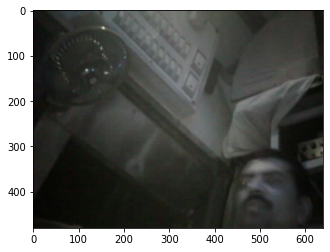

here 1
enter correct class for x_test[13]3
in this if
4
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0 0 0 1 1 1 2 2 2 3]
here 2
[0. 0. 1. 0.]


0

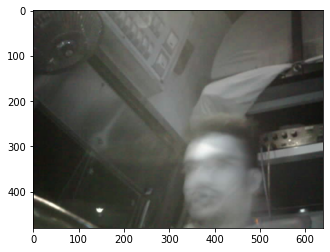

here 1
enter correct class for x_test[48]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2]
here 2
[0. 0. 0. 1.]


0

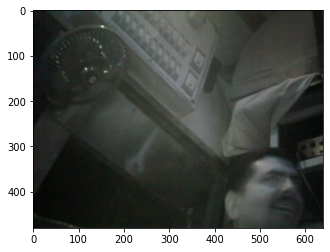

here 1
enter correct class for x_test[76]3
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0 0 0 1 1 1 2 2 2 3 2 3]
here 2
[0. 0. 0. 1.]


0

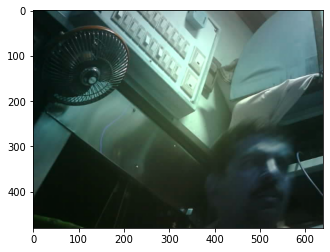

here 1
enter correct class for x_test[123]3
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3]
here 2
[0. 0. 0. 1.]


0

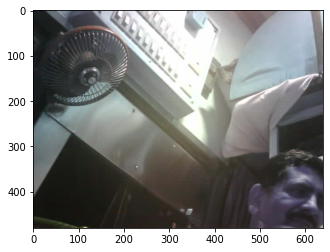

here 1
enter correct class for x_test[171]3
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3]
here 2
here 3
(14, 512)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
________________________________________________________

0

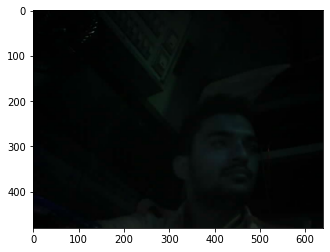

here 1
enter correct class for x_test[15]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2]
here 2
[0. 0. 1. 0.]


0

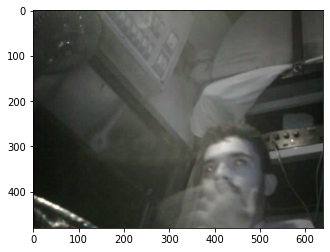

here 1
enter correct class for x_test[58]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2]
here 2
[0. 0. 1. 0.]


0

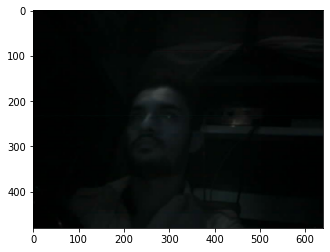

here 1
enter correct class for x_test[103]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2]
here 2
[0. 0. 1. 0.]


0

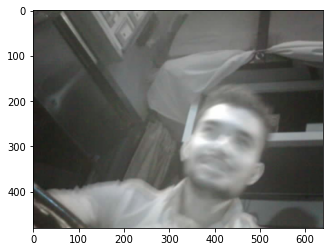

here 1
enter correct class for x_test[126]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2]
here 2
[0. 0. 1. 0.]


0

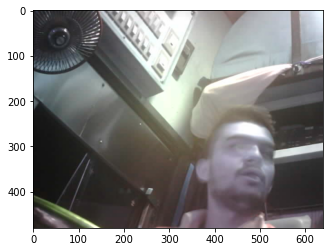

here 1
enter correct class for x_test[157]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2]
here 2
here 3
(19, 512)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_27 (Dropout)         (None, 1

0

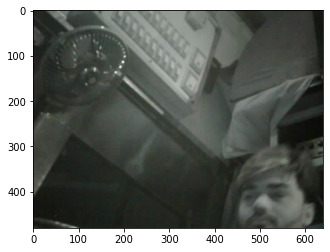

here 1
enter correct class for x_test[18]0
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2 0]
here 2
[0. 0. 1. 0.]


0

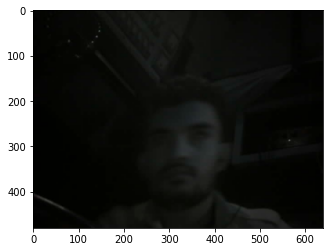

here 1
enter correct class for x_test[66]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2 0 2]
here 2
[0. 1. 0. 0.]


0

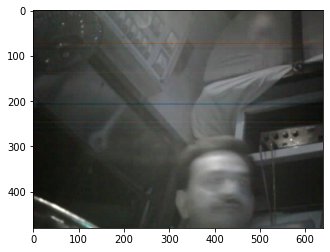

here 1
enter correct class for x_test[76]1
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2 0 2 1]
here 2
[0. 1. 0. 0.]


0

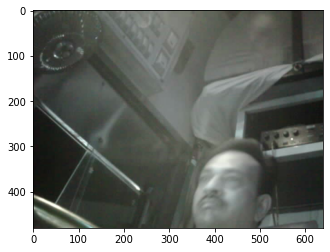

here 1
enter correct class for x_test[129]1
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2 0 2 1 1]
here 2
[0. 0. 1. 0.]


0

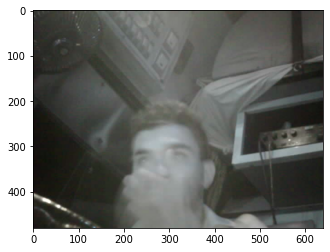

here 1
enter correct class for x_test[139]2
in func
returning
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[0 0 0 1 1 1 2 2 2 3 2 3 3 3 2 2 2 2 2 0 2 1 1 2]
here 2
here 3
(24, 512)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
__________________

In [71]:
%debug
model = modelFactory(class_count, X_train)
Y_pred, model_1 = activeLearning(0.00005, 25, 5, X_train, Y_train, X_test, Y_test, Images_train, Images_test, Y_train_ori, model)

In [72]:
print(Y_train_ori, class_count)

[0 0 0 1 1 1 2 2 2] 4


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 516       
Total params: 164,740
Trainable params: 164,740
Non-trainable params: 0
_________________________________________________________________
None
[[0.00999544 0.81635743 0.16300662 0.01064055]
 [0.00722175 0.80515796 0.17581423 0.01180615]
 [0.08778817 0

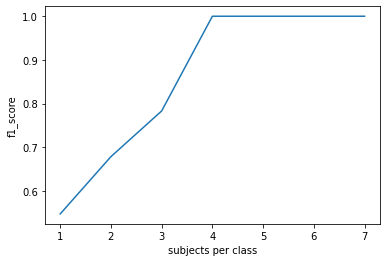

In [73]:
print(model_1.summary())
Y_f_pred = model_1.predict(X_f_test)
print(Y_f_pred)

Y_f_pred = [np.argmax(Y_f_pred[i]) for i in range(0,30)]
print(Y_f_pred)
print(Y_f_test)
from sklearn.metrics import f1_score
f1_scores = []
for i in range(0, 4):
    f1_scores.append(f1_score(Y_f_test, Y_f_pred, labels = [i], average = 'macro'))

f1_score = f1_score(Y_f_test, Y_f_pred, average = 'macro')

print(f1_scores)
print(f1_score)

"""
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7]
y = [0.54733742862212933, 0.6784919763399879, 0.7830995782807702, 1, 1, 1, 1]

plt.plot(x, y, label = 'AL')
plt.xlabel('subjects per class')
plt.ylabel('f1_score')
plt.show()
"""


In [29]:
print(model_1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 516       
Total params: 164,740
Trainable params: 164,740
Non-trainable params: 0
_________________________________________________________________
None
